# **NAMA : PUTRI WULANDARI**

# **NIM : 09011181722073**

 # "KLASIFIKASI CORONARY HEART DISEASE MENGGUNAKAN METODE 

# ARTIFICIAL NEURAL NETWORK"

### SEKILAS MENGENAI CORONARY HEART DISEASE

Populasi Coronary Heart Disease (Penyakit Jantung Koroner) selalu meningkat setiap tahunnya dengan jumlah kematian yang signifikan. Selain itu, kematian akibat penyakit jantung koroner mendapat prevalensi tertinggi di Indonesia sebesar 1,5 persen. Kesalahan diagnosis penyakit jantung koroner merupakan salah satu faktor utama yang menyebabkan kematian. 

Untuk mencegah kesalahan diagnosis penyakit Coronary Heart Disease (Penyakit Jantung Koroner), dibutuhkanlah suatu sistem berbasis artificial intelligent untuk kebutuhan diagnosis dan deteksi dini pada tiap pasien penderita penyakit jantung. Seperti diketahui, Neural Network merupakan sebuah supervised learning algorithm yang baik dalam tugas klasifikasi dan deteksi dini. Dalam model Neural Network ,implementasi klasifikasi diwakilkan dengan biner "1" jika seorang pasien terindikasi terserang Coronary Heart Disease (Penyakit Jantung Koroner) dan biner "0" jika seorang pasien tidak terindikasi terserang Coronary Heart Disease (Penyakit Jantung Koroner).

Untuk membantu analisis kinerja model yang dibuat, digunakanlah heart disease dataset. Adapun dataset tersebut diperoleh UCI machine learning repository 

### **INPUT LIBRARY YANG AKAN DIGUNAKAN**

Adapun library yang akan digunakan untuk pembuatan model dan proses training dan testing dalam menentukan data mana yang terindikasi terkena Heart Disease atau bukan adalah sebagai berikut

In [1]:
# main libraries
import pandas as pd 
import numpy as np

# visual libraries
from matplotlib import pyplot as plt 
plt.style.use('ggplot')

# sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef,classification_report,roc_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, StandardScaler

#keras libraries
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.activations import relu
from keras.utils.np_utils import to_categorical

C:\Users\Putri\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.



Library utama berisi library numpy dan pandas. Numpy berfungsi untuk mengolah angka berupa angka, agar bisa dibuat menjadi model Neural Network. Sedangkan Pandas berfungsi untuk mengolah data dalam bentuk dataframe.

Visual library berisi library yang digunakan untuk proses menampilkan grafik sebaran data ataupun berfungsi untuk menampilkan grafik perbandingan antara hasil training dan tersing data menggunakan model Neural Network yang telah dibuat

Sklearn library berisi library yang digunakan dalam proses preprocessing data yang akan ditraining dan akan ditesting. Proses preprocessing akan mengubah data menjadi format yang akan lebih mudah dan efektif diproses dalam model Neural Network. Adapun beberapa metode yangt digunakan dalam proses preprocessing, antara lain adalah: transformasi yang memanipulasi data mentah untuk menghasilkan satu input, denoising yang menghilangkan noise dari data, dan sebagainya.

Keras library berisi library yang digunakan dalam proses pembuatan model dan pengujian model Neural Network yang telah dibuat dibuat sebelumnya.

### PROSES IMPORT DATASET

Dataset yang digunakan dalam proses klasifikasi Coronary Heart Disease (Penyakit Jantung Koroner) adalah heart disease dataset yang diperoleh dari UCI machine learning repository (https://archive.ics.uci.edu/ml/datasets/Heart+Disease)

In [2]:
data = pd.read_csv('heart.csv')

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Heart Disease Dataset ini mengandung 76 atribut, tetapi semua percobaan yang diterbitkan merujuk pada penggunaan subset dari 14 atribut saja. Adapun 14 atribut data tersebut antara lain adalah usia, jenis kelamin, nyeri dada (cp), trestbps, kol, gula darah puasa (fbs), restecg, thalach, exang, oldpeak, slope, ca, thal, dan juga target atau klasifikasi. Dataset menjelaskan isi direktori dari Coronary Heart Disease (CHD). Data tersebut dikumpulkan dari Yayasan Klinik Cleveland, dengan jumlah kasus total adalah 303 kasus (241 laki-laki, 62 perempuan) dengan usia rata-rata: 51,25 ± 9,74 tahun.

Adapun target pada dataset tersebut menggambarkan klasifikasi dari data tersebut. Data yang bernilai "1" memiliki arti bahwa data tersebut terindikasi Coronary Heart Disease. Sedangkan data yang bernilai "0" merupakan data yang tidak terindikasi Coronary Heart Disease.

**Melihat Atribut Data**

Adapun 14 atribut dari dari Heart Disease Datase beserta tipe datanya antara lain adalah:

In [89]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [90]:
data.shape

(303, 14)

In [91]:
data.groupby('target')['target'].count()

target
0    138
1    165
Name: target, dtype: int64

Data tersebut terdiri dari 303 baris data pasien dan juga 14 kolom. Kolom tersebut menyatakan fitur dari data dan juga kelas dari data.

Berdasarkan data tersebut, usia, jenis kelamin, nyeri dada (cp), trestbps, kol, gula darah puasa (fbs), restecg, thalach, exang, oldpeak, slope, ca, dan thal merupakan fitur dari data tersebut.

Sedangkan target merupakan kelas dari Heart Disease Dataset. Ada dua kelas pada data tersebut yang dilambangkan dengan biner "1" dan juga dilambangkan dengan biner "0". Biner "1" menyatakan bahwa pasien tersebut terindikasi Coronary Heart Disease, sedangkan biner "0" menyatakan bahwa pasien tidak terindikasi Coronary Heart Disease.

Adapun persentase dan juga grafik perbandingan dari kedua kelas tersebut antara lain adalah:

In [92]:
All = data.shape[0]
terindikasi = data[data['target'] == 1]
tdk_terindikasi = data[data['target'] == 0]

x = len(terindikasi)/All
y = len(tdk_terindikasi)/All

print('Terindikasi :',x*100,'%')
print('Tidak Terindikasi :',y*100,'%')

Terindikasi : 54.45544554455446 %
Tidak Terindikasi : 45.54455445544555 %


Text(0,0.5,'Frekuensi')

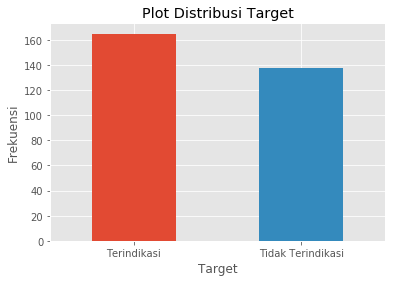

In [93]:
labels = ['Terindikasi','Tidak Terindikasi']
classes = pd.value_counts(data['target'], sort = True)
classes.plot(kind = 'bar', rot=0)
plt.title("Plot Distribusi Target")
plt.xticks(range(2), labels)
plt.xlabel("Target")
plt.ylabel("Frekuensi")

### **PROSES PERSIAPAN DATA**

Pada tahap ini, data dalam bentuk dataframe akan diubah menjadi berbentuk numpy array. Fungsi pengubahan ini adalah agar data tersebut menjadi mudah untuk diolah sehingga mudah diimplementasikan ke dalam model yang akan dibuat.

In [4]:
dataset = data.values

In [5]:
dataset

array([[63.,  1.,  3., ...,  0.,  1.,  1.],
       [37.,  1.,  2., ...,  0.,  2.,  1.],
       [41.,  0.,  1., ...,  0.,  2.,  1.],
       ...,
       [68.,  1.,  0., ...,  2.,  3.,  0.],
       [57.,  1.,  0., ...,  1.,  3.,  0.],
       [57.,  0.,  1., ...,  1.,  2.,  0.]])

Heart Disease Dataset terdiri dari 13 fitur yang tersusun dari kolom pertama hingga kolom 13 pada data dan juga kelas yang berada di kolom 14. Data pada Heart Disease Dataset ini nantinya akan dipisahkan antara fitur data dan juga kelas data. Adapun cara memisahkannya antara lain adalah:

In [96]:
features = dataset[:, 0:13]
labels = dataset [:, 13]

Data untuk setiap fitur dalam bentuk numpy array adalah

In [94]:
features

array([[63.,  1.,  3., ...,  0.,  0.,  1.],
       [37.,  1.,  2., ...,  0.,  0.,  2.],
       [41.,  0.,  1., ...,  2.,  0.,  2.],
       ...,
       [68.,  1.,  0., ...,  1.,  2.,  3.],
       [57.,  1.,  0., ...,  1.,  1.,  3.],
       [57.,  0.,  1., ...,  1.,  1.,  2.]])

Data setiap kelas dalam bentuk numpy array adalah

In [97]:
labels

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

### **PROSES PRE-PROCESSING DATA**

**One Hot Encoding**

One Hot Encoding adalah representasi variabel kategorikal sebagai vektor biner. Metode ini pertama-tama mensyaratkan bahwa nilai-nilai kategorikal akan dipetakan ke dalam nilai integer.

In [7]:
enc = OneHotEncoder() 
Y = enc.fit_transform(labels[:, np.newaxis]).toarray()

**Min-Max Scaler**

Biasanya dalam dataset yang masih mentah, beberapa variabel memiliki nilai yang sangat bervariasi dan random, jadi sangat penting untuk di scale tersebut agar memiliki nilai dengan rentang yang tidak terlalu jauh. MinMaxScaler digunakan untuk mengubah skala fitur dari yang memiliki nilai rentang yang berjauhan menjadi nilai rentang yang berdekatan. Adapun rentang yang diberikan untuk setiap fitur pada Heart Disease Datase adalah 0 & 1, hal ini dikarenakan klasifikasi dataset tersebut menggunakan binary classification.

In [8]:
scaler = MinMaxScaler()
features_scale=scaler.fit(features)
features_scale = scaler.fit_transform(features)

**Categorical**

Digunakan untuk mengubah array data berlabel (dari 0 ke nb_classes-1) ke bentuk one-hot vector. 

In [9]:
labels_categorical = to_categorical(labels)
labels_categorical.shape

(303, 2)

### **PROSES SPLIT DATA**

Proses split data ini dilakukan untuk membagi data menjadi dua yaitu data yang digunakan untuk kepentingan training dan juga data untuk kepentingan testing. Adapun data yang digunakan untuk keperluan testing adalah sebesar 20% dari jumlah data sejumlah 61 data (test_size = 0.2) dan sisa 80% nya sejumlah 242 data digunakan untuk keperluan training.

In [123]:
training_data, testing_data, training_label, testing_label = train_test_split(features_scale,labels_categorical , test_size=0.2, shuffle=True, stratify=labels)

### **MEMBUAT DAN MELAKUKAN COMPILE MODEL**

Model klasifikasi dalam kasus ini menggunakan adalah model yang dibuat dengan menggunakan fungsi Sequential.

Jumlah input layer pada model ini disesuaikan dengan fitur pada Heart Disease Dataset yaitu sebanyak 13 input. Adapun fungsi aktivasi yang digunakan adalah fungsi activation  ReLu (Rectified Linear Unit), cara kerjanya adalah dengan mengubah setiap nilai input negatif menjadi 0 pada grafik sesegera mungkin.

Jumlah hidden layer pada model ini adalah 2 layer, dimana masing-masing layer memiliki 13 unit Neural Network

Jumlah output layer adalah 1 layer dengan jumlah unit sebanyak 2 unit Neural Network yang mendfinisikan pasien terindikasi Coronary Heart Disease atau tidak. Adapun fungsi aktivasi yang digunakan adalah activation softmax (karena data sudah diubah menjadi categorical)

Model tersebut kemudian dicompile menggunakan loss layer binary crossentropy karena jumlah kelas hanya berjumlah 2 dan optimezer yang digunakan adalah optimizer Adam dari keras model.

In [124]:
model = Sequential()
model.add(Dense(13, input_dim=13, activation='relu'))
model.add(Dense(13, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### **PROSES FIT MODEL**

Untuk mendapatkan dan melihat hasil akurasi dan loss dari Heart Disease Dataset, langkah selanjutnya yang harus dilakukan adalah fit model. Pada proses ini terjadi proses training dan testing dengan parameter:
1. fitur yang telah di preprocessing
2. label yang telah dikonversi menjadi categorical
3. Banyaknya batch size yang digunakan
4. Banyaknya epoch yang dilakukan

Untuk mendapatkan hasil komputasi yang lebih teliti, maka batch size harus diset dalam jumlah yang kecil. Adapun batch size yang digunakan pada proses fit model ini adalah sejumlah 10 batch size dan epoch yang digunakan adalah 100 epoch.

In [125]:
acc_training = model.fit(training_data, training_label, validation_data=(testing_data, testing_label), batch_size=10, epochs=100)

Train on 242 samples, validate on 61 samples
Epoch 1/100
242/242 [==============================] - 2s 7ms/step - loss: 0.7347 - accuracy: 0.4752 - val_loss: 0.6644 - val_accuracy: 0.5410
Epoch 2/100
242/242 [==============================] - 0s 789us/step - loss: 0.6572 - accuracy: 0.5702 - val_loss: 0.6238 - val_accuracy: 0.6230
Epoch 3/100
242/242 [==============================] - 0s 818us/step - loss: 0.6173 - accuracy: 0.7025 - val_loss: 0.5808 - val_accuracy: 0.7705
Epoch 4/100
242/242 [==============================] - 0s 419us/step - loss: 0.5782 - accuracy: 0.7810 - val_loss: 0.5370 - val_accuracy: 0.8197
Epoch 5/100
242/242 [==============================] - 0s 664us/step - loss: 0.5432 - accuracy: 0.7893 - val_loss: 0.4975 - val_accuracy: 0.8033
Epoch 6/100
242/242 [==============================] - 0s 715us/step - loss: 0.5135 - accuracy: 0.8017 - val_loss: 0.4663 - val_accuracy: 0.8361
Epoch 7/100
242/242 [==============================] - 0s 678us/step - loss: 0.4843 - a

242/242 [==============================] - 0s 644us/step - loss: 0.3234 - accuracy: 0.8884 - val_loss: 0.3151 - val_accuracy: 0.8689
Epoch 57/100
242/242 [==============================] - 0s 870us/step - loss: 0.3248 - accuracy: 0.8760 - val_loss: 0.3124 - val_accuracy: 0.8689
Epoch 58/100
242/242 [==============================] - 0s 445us/step - loss: 0.3219 - accuracy: 0.8884 - val_loss: 0.3140 - val_accuracy: 0.8689
Epoch 59/100
242/242 [==============================] - 0s 521us/step - loss: 0.3223 - accuracy: 0.8678 - val_loss: 0.3139 - val_accuracy: 0.8689
Epoch 60/100
242/242 [==============================] - 0s 682us/step - loss: 0.3186 - accuracy: 0.8884 - val_loss: 0.3147 - val_accuracy: 0.8689
Epoch 61/100
242/242 [==============================] - 0s 898us/step - loss: 0.3159 - accuracy: 0.8802 - val_loss: 0.3165 - val_accuracy: 0.8689
Epoch 62/100
242/242 [==============================] - 0s 943us/step - loss: 0.3186 - accuracy: 0.8884 - val_loss: 0.3145 - val_accuracy

**Hasil Akurasi Training**

Adapun hasil akurasi training dari hasil fit model adalah

In [140]:
training  = model.evaluate(training_data, training_label) 

242/242 [==============================] - 0s 555us/step


In [141]:
training

[0.26575515881057615, 0.9049586653709412]

Besar akurasi training adalah kurang lebih 90%

**Hasil Akurasi Testing**

Adapun hasil akurasi testing dari hasil fit model adalah

In [142]:
testing  = model.evaluate(testing_data, testing_label) 

61/61 [==============================] - 0s 1ms/step


In [143]:
testing

[0.3251884335377177, 0.8360655903816223]

Besar akurasi testing adalah kurang lebih 83,6%

### GRAFIK AKURASI

Adapun grafik akurasi dari hasil proses fit model, adalah

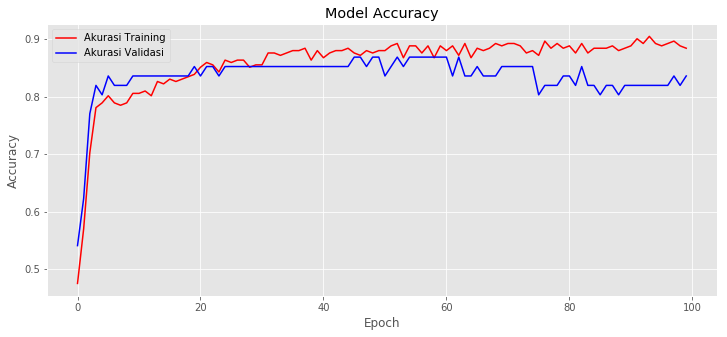

In [126]:
fig,(ax0) = plt.subplots(nrows=1, figsize=(12,5))
ax0.plot(acc_training.history['accuracy'],'red', label='Akurasi Training')
ax0.plot(acc_training.history['val_accuracy'], 'blue', label='Akurasi Validasi')
ax0.plot(label='Accuracy', loc='upper left')
ax0.set_title('Model Accuracy')
ax0.set_xlabel("Epoch")
ax0.set_ylabel("Accuracy")
ax0.legend()
plt.savefig('Grafik Akurasi.png')

Berdasarkan hasil grafik akurasi tersebut, dapat dilihat bahwa masih terjadi ketidakstabilan antar hasil akurasi dari epoch pertama hingga epoch terakhir. Adapun hasil akurasi training lebih tinggi dibandingkan dengan hasil akurasi testing, sehingga terjadi overfitting.

### GRAFIK LOSS

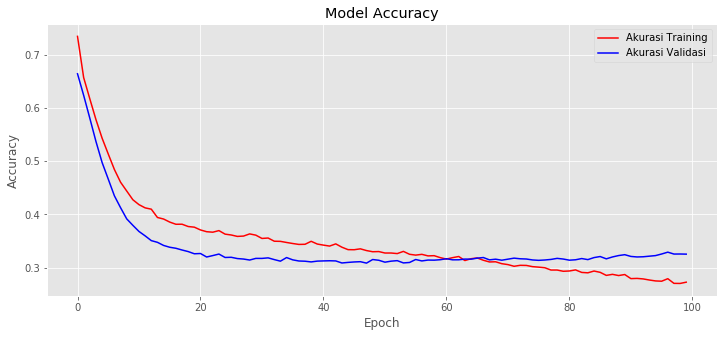

In [127]:
fig,(ax0) = plt.subplots(nrows=1, figsize=(12,5))
ax0.plot(acc_training.history['loss'],'red', label='Akurasi Training')
ax0.plot(acc_training.history['val_loss'], 'blue', label='Akurasi Validasi')
ax0.plot(label='Accuracy', loc='upper left')
ax0.set_title('Model Accuracy')
ax0.set_xlabel("Epoch")
ax0.set_ylabel("Accuracy")
ax0.legend()
plt.savefig('Grafik LOSS.png')

### CONFUSSION MATRIKS UNTUK EVALUASI MODEL

Confussion matriks digunakan untuk melakukan evaluasi model dengan cara melihat presisi dari model dan akurasi dari model tersebut

In [133]:
from sklearn.metrics import confusion_matrix,classification_report,precision_score,f1_score,recall_score,accuracy_score
prediction = model.predict_classes(testing_data)

In [129]:
label_testing = np.argmax(testing_label,axis=1)

In [130]:
cm = confusion_matrix(label_testing, prediction) 
print(cm)

[[24  4]
 [ 6 27]]


Berdasarkan matriks tersebut, 24 merupakan true positif (tp) yang menjelaskan bahwa model tersebut memprediksi pasien terindikasi penyakit dan pasien tersebut benar-benar terindikasi mengindap penyakit tersebut.

Angka 4 merupakan false positive (fp) yang menjelaskan bahwa model tersebut memprediksi pasien terindikasi penyakit dan pasien tersebut ternyata tidak terindikasi mengindap penyakit tersebut.

Angka 6 merupakan false negatif (fn) yang menjelaskan bahwa bahwa model tersebut memprediksi pasien tidak terindikasi penyakit dan pasien tersebut ternyata benar-benar mengindap penyakit tersebut.

Angka 27 merupakan true negatif (tn) yang menjelaskan bahwa model tersebut memprediksi pasien tidak terindikasi penyakit dan pasien tersebut ternyata benar-benar tidak terindikasi mengindap penyakit tersebut.

In [131]:
tp = cm[0,0]
tn = cm[1,1]
fp = cm[0,1]
fn = cm[1,0]

In [144]:
precision = tp / ( tp + fp)
recall = tp/(tp+fn)
f1=(2*precision*recall)/ (precision+recall)
akurasi = (tp+tn)/(tp+tn+fp+fn)

### Presisi

Merupakan kemampuan model dalam mengidentifikasi data yang relevan

In [145]:
precision

0.8571428571428571

### Recall

Merupakan kemampuan model untuk menemukan semua kasus yang relevan dalam satu dataset

In [146]:
recall

0.8

### F1 Score

Merupakan rata-rata nilai dari nilai presisi dan recall. 

In [147]:
f1

0.8275862068965518

### Akurasi

Merupakan rasio pengamatan yang diprediksi dengan benar dari total pengamatan yang dilakukan

In [148]:
akurasi

0.8360655737704918

**Jadi nilai presisi dari model ini adalah kurang lebih 85%, nilai recall adalah 80%, nilai f1 score adalah kurang lebih 82% dan nilai akurasinya adalah 83%**






Sumber Referensi : Coronary Heart Disease Interpretation Based on Deep Neural Network (Annisa Darmawahyuni, Siti Nurmaini*, Firdaus )